In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import sys 
sys.path.append('../../../')
sys.path.append('../')
from build_scale_solver import build_erg_time_opt_solver
from time_opt_erg_lib.obstacle import Obstacle
import time 

import dill as pkl

In [6]:
scales = [1.0,10.0,100.0]
trials = 1
logs = {'times' : [],'solutions' : []}
for trial in range(trials):
    logs['times'].append([])
    for scale in scales: 
        args = {
            'N' : 800, 
            'x0' : np.array([0.02, .02])*scale,
            'xf' : np.array([.988, .920])*scale,
            'erg_ub' : 0.001,
            'alpha' : 0.9,
            'wrksp_bnds' : np.array([[0.,1.],[0.,1.]])*scale
        }
        solver = build_erg_time_opt_solver(args, tf_init=10.0)
        start_time = time.time()
        solver.solve(max_iter=20_000, eps=1e-58, alpha=1.000000001)
        end_time = time.time()
        print(end_time-start_time)
        logs['times'][trial].append(end_time-start_time)
        print(solver.get_solution()['tf'])

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


unsuccessful, tol:  0.00010320544
45.791682720184326
0.2731658
unsuccessful, tol:  0.0017437935
46.5562539100647
2.3806667
unsuccessful, tol:  0.08164215
46.326356410980225
37.08181


In [13]:
pkl.dump(logs, open('../data/multiscale_computation.pkl', 'wb'))

In [8]:
print(
    np.mean(np.array(logs['times']), axis=0),
    np.std(np.array(logs['times']), axis=0),
)

[44.36029782 45.63932018 44.99898999] [0.63174492 0.65240328 0.60287223]


# Plot results

In [4]:
logs = pkl.load(open('../data/multiscale_computation.pkl', 'rb'))
data = np.array(logs['times'])

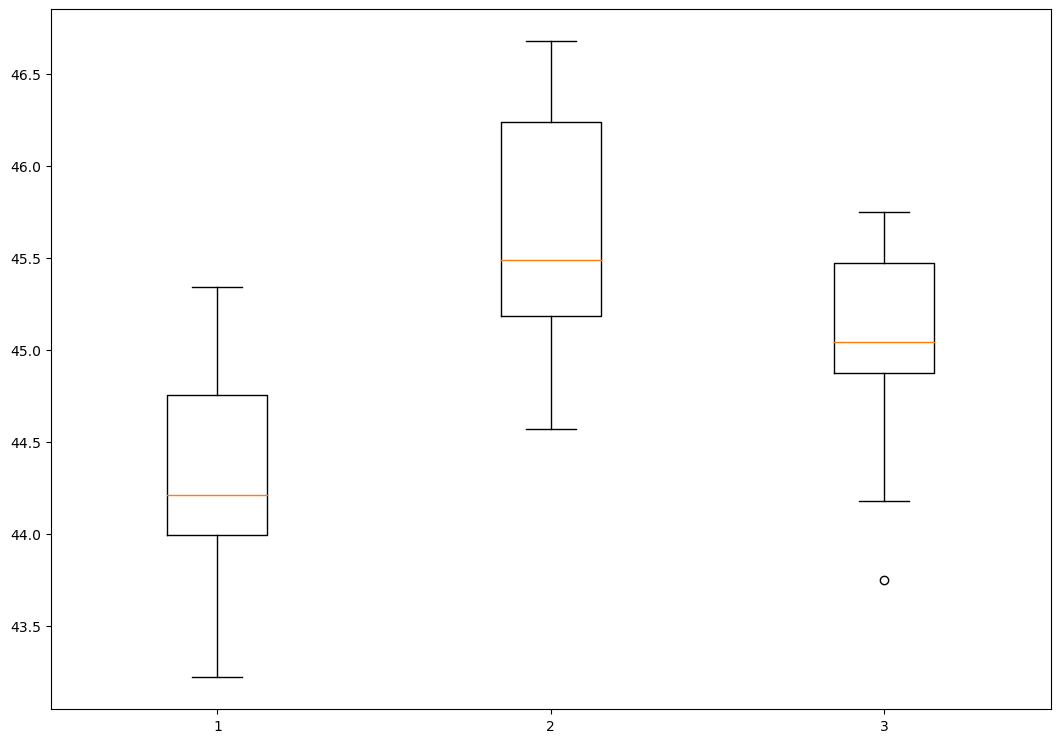

In [5]:
np.random.seed(10)
 
# data_1 = np.random.normal(100, 10, 200)
# data_2 = np.random.normal(90, 20, 200)
# data_3 = np.random.normal(80, 30, 200)
# data_4 = np.random.normal(70, 40, 200)
# data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [4]:
sol = solver.get_solution()
print(sol['tf'])

37.078617


(0.0, 100.0)

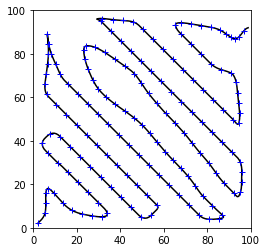

In [5]:
fig, ax = plt.subplots() 

ax.plot(sol['x'][:,0], sol['x'][:,1],'k')
ax.plot(sol['x'][::5,0], sol['x'][::5,1],'b+')

# patches = []
# for ob in obs: 
#     circ = ob.draw()
#     patches.append(circ)

# ax.add_collection(PatchCollection(patches, color='g'))
ax.axis('square')
ax.set_xlim(0,1*scale)
ax.set_ylim(0,1*scale)

# plt.savefig('scaled_search_forest.pdf')
